# Tutorial 4b - PSF and MTF Calculation

### June 2024

This tutorial shows how to calculate the point spread function (PSF) and modulation transfer function (MTF) of a lens.

In [1]:
from optiland import mtf, psf
from optiland.samples.objectives import CookeTriplet

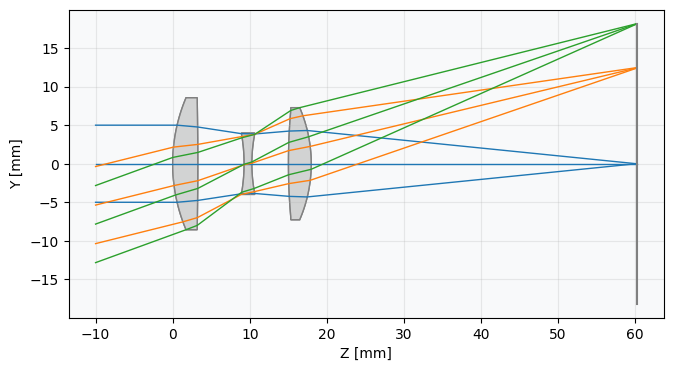

In [2]:
lens = CookeTriplet()
lens.draw()

We first compute the PSF using the FFT-based approach. We demonstrate various ways to generate and plot the PSF.

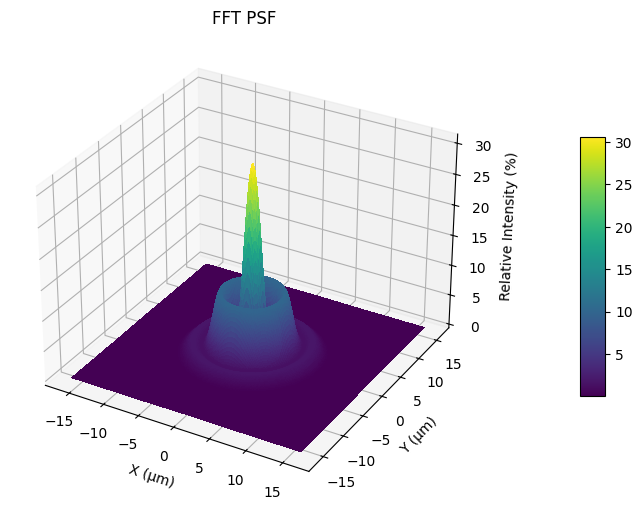

In [3]:
lens_psf = psf.FFTPSF(lens, field=(0, 0), wavelength=0.55)
lens_psf.view(projection="3d", num_points=256)

In [4]:
print(f"Strehl Ratio: {lens_psf.strehl_ratio():.3f}")

Strehl Ratio: 0.308


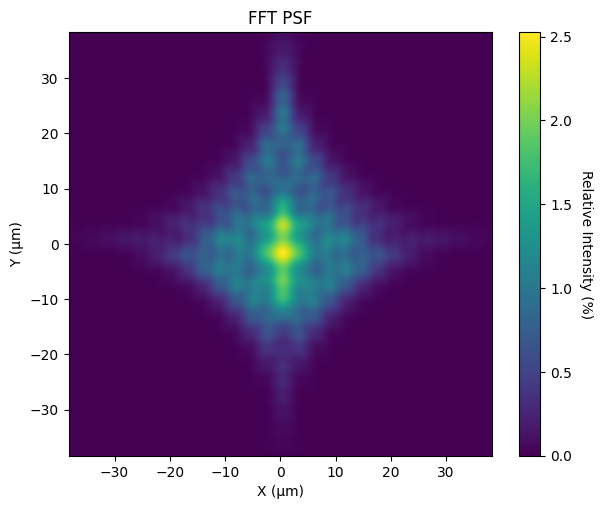

In [5]:
lens_psf = psf.FFTPSF(lens, field=(0, 0.7), wavelength=0.55)
lens_psf.view(num_points=512)

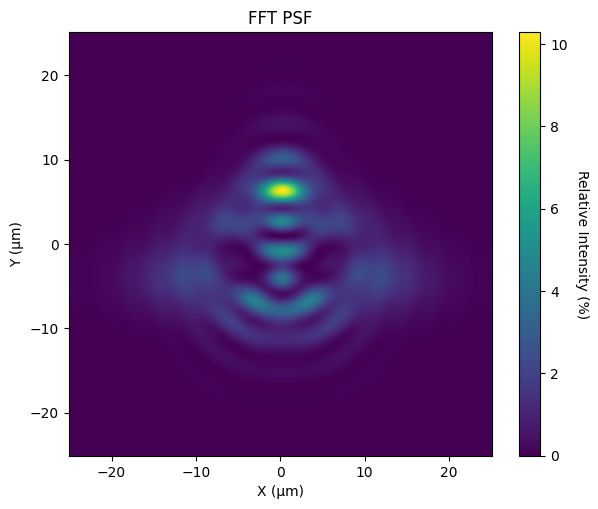

In [6]:
lens_psf = psf.FFTPSF(lens, field=(0, 1.0), wavelength=0.55)
lens_psf.view(projection="2d", num_points=256)

We can also generate the PSF using direct Huygens-Fresnel integration. This is referred to as the "Huygens PSF".

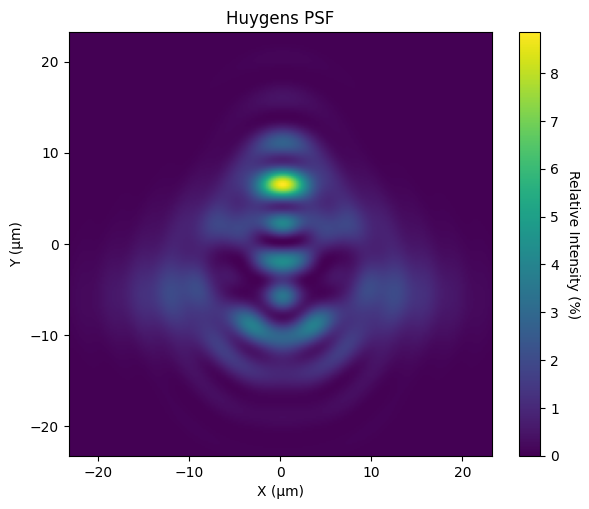

In [7]:
lens_huygens_psf = psf.HuygensPSF(lens, field=(0, 1.0), wavelength=0.55)
lens_huygens_psf.view(projection="2d", num_points=256)

Now, we generate the geometric MTF, which uses only ray intersection locations on the image plane and ignores diffraction. The geometric MTF is a reasonable approximation when the lens is far from the diffraction limit.

As is standard, the geometric MTF is scaled based on the diffraction-limited MTF curve. This assures that the geometric MTF cannot show performance better than the diffraction limit.

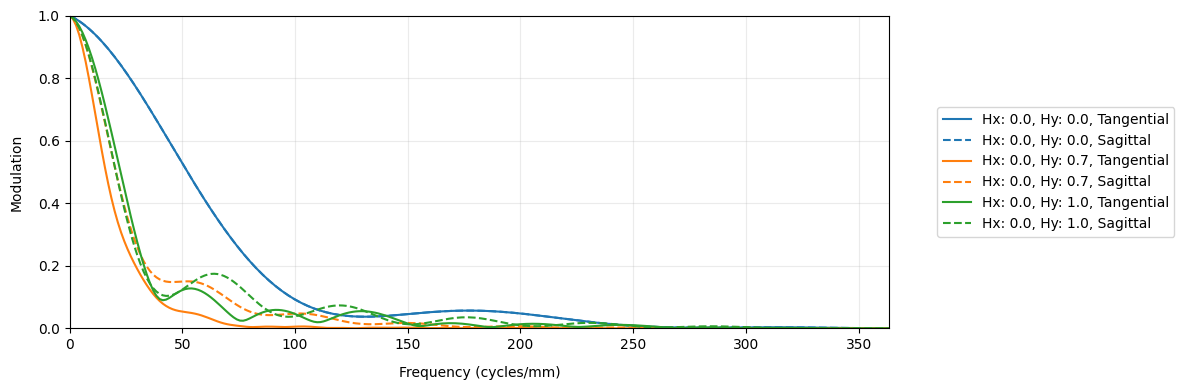

In [8]:
geo_mtf = mtf.GeometricMTF(lens)
geo_mtf.view()

Finally, we show the standard FFT-based MTF.

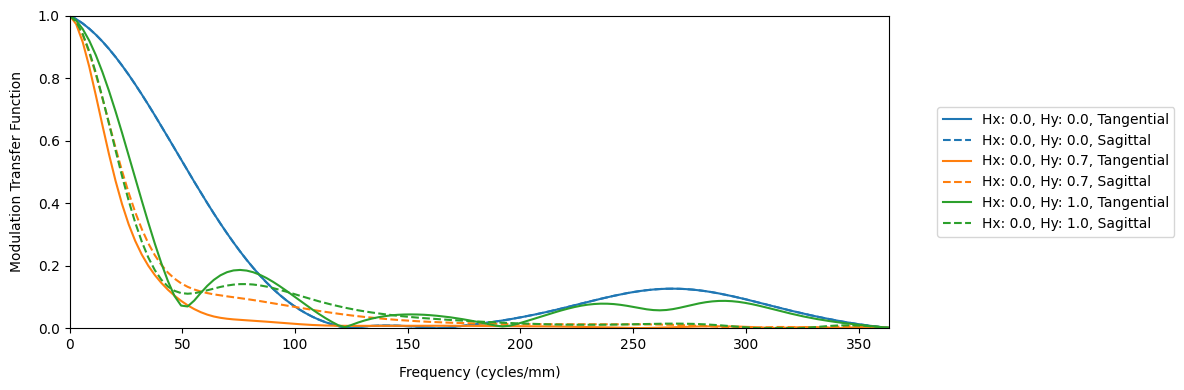

In [9]:
lens_mtf = mtf.FFTMTF(lens)
lens_mtf.view()